Ch2.  사이킷런으로 시작하는 머신러닝
05. GBM

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 파일에는 피처이름 인덱스와 피처명이 공백으로 분리되어있음 > df에 로드
feature_name_df=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
# 피처명 인덱스를 제거하고, 피처명 리스트 객체로 생성 후 샘플로 10개 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print("전체 피처명에서 10개만 추출:",feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [37]:
# 중복된 피처명 확인
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()
#_1,_2 붙여서 로드하는 함수
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                                           if x[1]>0 else x[0],axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

column_index    42
dtype: int64


In [39]:
import pandas as pd
def get_human_dataset():
    feature_name_df=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/features.txt',sep='\s+',header=None,names=['column_index','column_name'])
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    #df에 피처명을 칼럼으로 부여하기 위해 리스트로
    feature_name=new_feature_name_df.iloc[:,1].values.tolist()
    # 학습 피처 데이터와 테스트 피처 데이터를 df로 로딩
    X_train=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    #학습 레이블과 테스트 레이블을 로딩
    y_train=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test=pd.read_csv('/Users/bluecloud/Documents/대학/유런/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    return X_train,X_test,y_train,y_test


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test=get_human_dataset()
# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy_score(y_test,gb_pred)

print('GBM 정확도  : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}'.format(time.time()-start_time))

KeyboardInterrupt: 

In [41]:
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test=get_human_dataset()
params={'n_estimators':[100,500],'learning_rate':[0.05,0.1]}
grid_cv=GridSearchCV(gb_clf,param_grid=params,cv=2,verbose=1)
grid_cv.fit(X_trian,y_train)
print('최적의 하이퍼 파라미터 :\n',grid_cv.best_params_)
print('최고 예측 정확도 :{0:.4f}'.format(grid_cv.best_score_))

NameError: name 'X_trian' is not defined

06. XGBoost

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

In [45]:
import xgboost
print(xgboost.__version__)

2.1.1


위스콘신 유방암 예측

In [47]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_df=pd.DataFrame(data=X_features,columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [49]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [53]:
dtrain=xgb.DMatrix(data=X_train,label=y_train)
dtest=xgb.DMatrix(data=X_test,label=y_test)

In [55]:
params={
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss', 
    'early_stoppings':100
}
num_rounds=400

In [63]:
# train 데이터 세트는 'train', evaluation 데이터 세트는 'eval'로 명기
wlist=[(dtrain,'train'),(dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds,early_stopping_rounds=100,evals=wlist)

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

In [65]:
pred_probs=xgb_model.predict(dtest)
print('prdedict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))
# 0과 1이 아닌 확률값으로 나오므로 0.5 기준으로 0과 1로 표시하도록 > preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

prdedict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.904 0.004 0.908 0.267 0.992 1.    1.    0.999 0.994 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [71]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

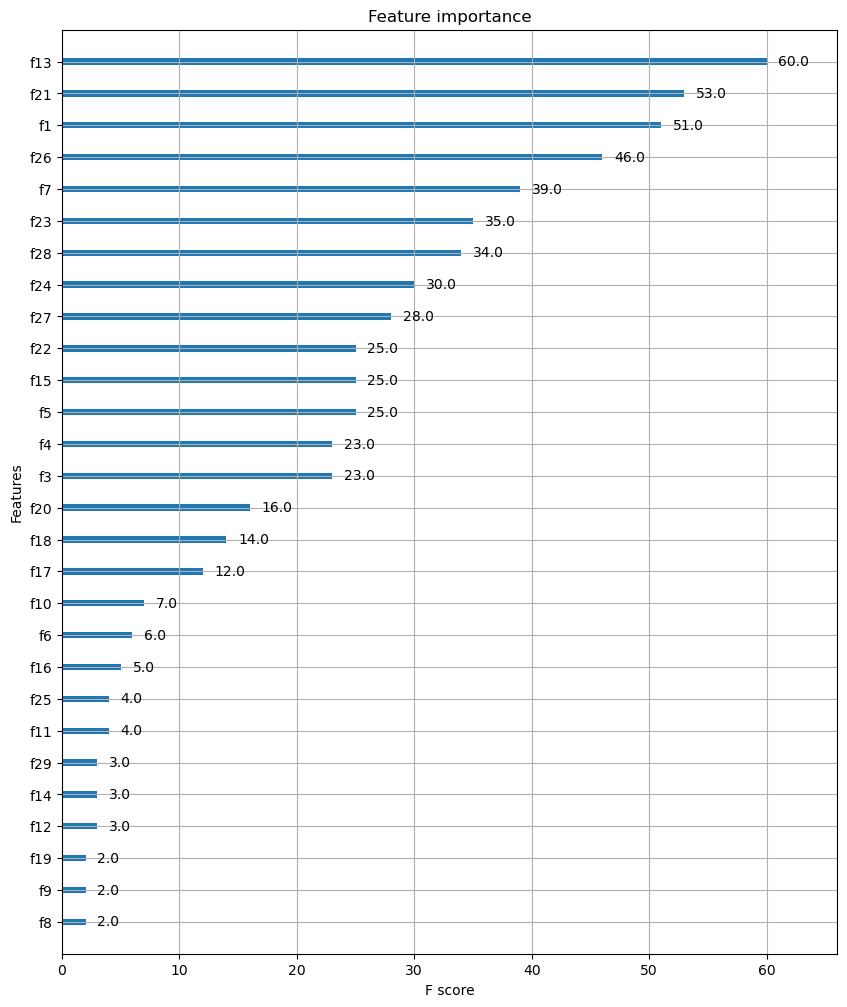

In [73]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [75]:
xgboost.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,folds=None,metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None,show_stdv=True,seed=0,callbacks=None,shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.584737,0.005961,0.592041,0.008024
1,0.517898,0.004745,0.532735,0.007335
2,0.462199,0.003589,0.483123,0.008418
3,0.415639,0.003043,0.441435,0.011510
4,0.375350,0.002036,0.406194,0.014400
5,0.340102,0.000854,0.373831,0.015171
6,0.308902,0.000900,0.348411,0.018183
7,0.281927,0.001335,0.324136,0.017817
8,0.257775,0.001182,0.304679,0.021239
9,0.236439,0.001313,0.286202,0.021203


In [77]:
##  XGBClassifier 이용해 예측
from xgboost import XGBClassifier 
xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [79]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9947


In [87]:
import xgboost as xgb
from xgboost import DMatrix

# pandas가 아닌 DMatrix 사용
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 3,
    'eval_metric': 'logloss'
}

# 조기 중단으로 데이터 셋 훈련
evals = [(dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=400,
    evals=evals,
    early_stopping_rounds=100,
    verbose_eval=True
)

# 테스트 세트를 평가용으로 사용
ws100_preds = bst.predict(dtest)
ws100_pred_proba = ws100_preds

[0]	eval-logloss:0.56554
[1]	eval-logloss:0.50669
[2]	eval-logloss:0.45868
[3]	eval-logloss:0.41822
[4]	eval-logloss:0.38103
[5]	eval-logloss:0.35137
[6]	eval-logloss:0.32588
[7]	eval-logloss:0.30127
[8]	eval-logloss:0.28197
[9]	eval-logloss:0.26265
[10]	eval-logloss:0.24821
[11]	eval-logloss:0.23231
[12]	eval-logloss:0.22079
[13]	eval-logloss:0.20795
[14]	eval-logloss:0.19764
[15]	eval-logloss:0.18950
[16]	eval-logloss:0.18052
[17]	eval-logloss:0.17246
[18]	eval-logloss:0.16512
[19]	eval-logloss:0.15828
[20]	eval-logloss:0.15436
[21]	eval-logloss:0.14633
[22]	eval-logloss:0.13936
[23]	eval-logloss:0.13393
[24]	eval-logloss:0.13015
[25]	eval-logloss:0.12489
[26]	eval-logloss:0.12206
[27]	eval-logloss:0.11890
[28]	eval-logloss:0.11637
[29]	eval-logloss:0.11293
[30]	eval-logloss:0.11040
[31]	eval-logloss:0.10826
[32]	eval-logloss:0.10452
[33]	eval-logloss:0.10322
[34]	eval-logloss:0.10059
[35]	eval-logloss:0.09869
[36]	eval-logloss:0.09658
[37]	eval-logloss:0.09487
[38]	eval-logloss:0.09

In [91]:
get_clf_eval(y_test,ws100_preds,ws100_pred_proba)

ValueError: Classification metrics can't handle a mix of binary and continuous targets